# Laboratório #1

### ATENCÃO

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Copie o código do exemplo `Figura 3D`, presente no material de introdução, e o execute. Cole o código na célula abaixo em seguida, execute-o.

In [17]:
# Digite aqui o código do exercício.

import matplotlib.pyplot as plt
# facilita visualizacao de figuras 3D
from mpl_toolkits.mplot3d import axes3d # graficos 3D sao habilitados importando axes3d

# para figuras interativas usar “notebook” ao inves de “inline”
%matplotlib notebook

ax = plt.subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z)

# salva figura em arquivo
plt.savefig('figura3d.png')

<IPython.core.display.Javascript object>

#### 2)  Copie o código do exemplo `Histograma`, presente no material de introdução, e o execute. Cole o código na célula abaixo em seguida, execute-o.

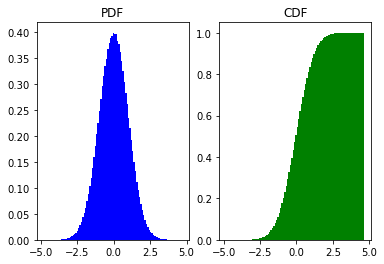

In [18]:
# Digite aqui o código do exercício.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.random.randn(1000000)

# histograma (pdf)
plt.subplot(1, 2, 1)
plt.title('PDF')
plt.hist(data, bins=100, density=True, color='b')

# CDF empirica
plt.subplot(1, 2, 2)
plt.title('CDF')
plt.hist(data, bins=100, density=True, color='g', cumulative=True)

plt.savefig('histogram.png') # salva figura em arquivo

#### 3)  Neste exercício você irá plotar um gráfico 2D. 

Este tipo de gráfico é comumente utilizado para se analisar os dados de entrada e saída de um modelo de aprendizado de máquina. Crie um vetor coluna, $y$, com $M = 1000$ elementos, onde $y$ é dado pela seguinte equação

 $$y = 1.2 + 2.3x + 10w,$$
 
onde $x$ é um vetor coluna com $M$ elementos retirados de uma distribuição aleatória uniforme com valores no intervalo em `[0, 1)` e $w$ é um vetor coluna com $M$ elementos retirados de uma **distribuição aleatória Gaussiana normal**, ou seja, com média 0 e variância unitária. 

Plote um gráfico com os vetores $x$ e $y$ sendo os eixos $x$ e $y$, respectivamente. Cada par de valores $(x,y)$ deve ser mostrado no gráfico como sendo um **ponto**.

Após plotar o gráfico e analisá-lo, você acha ser possível encontrar uma **reta** que consiga aproximar (com o menor erro possível) os valores de $y$ dado um valor de $x$ entre 0 e 1?

**Dicas**: 

1. Use o módulo random da biblioteca numpy para gerar números aleatórios: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

2. Use a biblioteca matplotlib para plotar gráficos: https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/simple_plot.html

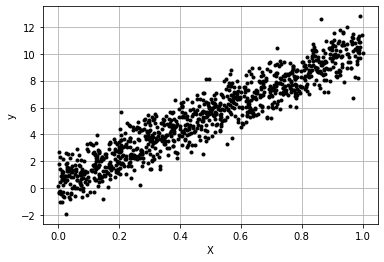

In [19]:
# Digite aqui o código do exercício.

import numpy as np
import matplotlib.pyplot as plt

M = 1000

x = np.random.rand(M,1)
w = np.random.randn(M,1)

y = 0.5 + 10*x + w

plt.figure()
plt.plot(x, y, '.k')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

# salva figura em arquivo
plt.savefig('figura2d.png')

#### 4)  Copie o código do exemplo `Ajuste de curva com Redes Neurais`, presente no material de introdução, e o execute. Cole o código na célula abaixo em seguida, execute-o.

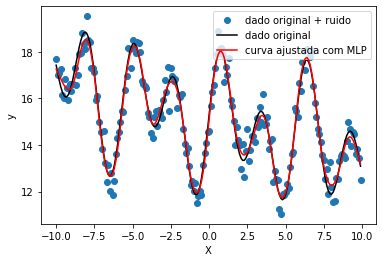

In [20]:
# Digite aqui o código do exercício.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor # importa classe MLPRegressor do modulo neural network

%matplotlib inline

x = np.arange(-10, 10, 0.1)

# dados originais
y = 12 + 3 * np.exp(-0.05*x) + 1.4 * np.sin(1.2*x) + 2.1 * np.sin(-2.2*x + 3)

# faz com que o gerador de numeros aleatorios sempre forneca os mesmos valores
np.random.seed(42) 

# adicionando ruido aos dados originais
y_noise = y + np.random.normal(0, 0.5, size = len(y))

# trata o ajuste de curva como um problema de regressao e treina um modelo para que se ajuste aos dados.
mlp = MLPRegressor(hidden_layer_sizes=(50,25,10), max_iter=10000, solver='lbfgs', alpha=0.9, activation='tanh')
yfit = mlp.fit(x[:, None], y_noise).predict(x[:, None])

plt.figure()
plt.plot(x, y_noise, 'o', label = 'dado original + ruido')
plt.plot(x, y, 'k', label = 'dado original')
plt.plot(x, yfit, '-r', label = 'curva ajustada com MLP', zorder = 10)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

# salva figura em arquivo
plt.savefig('mlp_regression.png')